##Importing the required libraries


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)

import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import nltk
nltk.download('all')

##Uploading the .csv files

In [ ]:
filenames_list = []
for i in range(14):
  if i<9:
    name = f"/content/Jan0{i+1}.csv"
  else:
    name = f"/content/Jan{i+1}.csv"
  filenames_list.append(name)
print(filenames_list)

In [ ]:
data = []
for i in range(14):
  name = f"df{i+1}"
  df = pd.read_csv(filenames_list[i])
  data.append(df)


In [ ]:
df = pd.concat(data)
df

In [ ]:
df = df.rename({'Processed_Text': 'Text'}, axis='columns')
df.drop(columns="Unnamed: 0", inplace=True)

##Extracting text from the data frame and appending to a list

In [ ]:
text_list = []
for i in range(len(df)):
  text_list.append(df['Text'].values[i])
text_list

In [ ]:
flat_list = []
flat_list1 = []
for i in text_list:
  for j in i:
    flat_list1.append(j)
flat_list = "".join(flat_list1)
flat_list

##Data Cleansing for the entire corpus of text

In [ ]:
for m in range(len(df)):
  
  #Removing all non-letters and non-digits
  df['Text'].values[m] = (re.sub(r"\W", " ", df['Text'].values[m]))
  

  #Removing all extra white spaces
  df['Text'].values[m] = " ".join(df['Text'].values[m].split())


In [ ]:
df['Text']

In [ ]:
# Function to perform Tokenizing 
def tokenizing(Text):
  split = re.split('\W+', Text)
  return split

In [ ]:
df['Text']=df['Text'].apply(lambda x: tokenizing(x.lower()))

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

##Frequency distribution Graph for the most frequently occuring words 

In [ ]:
import nltk
#from nltk.corpus import webtext
from nltk.probability import FreqDist


data_analysis = nltk.FreqDist(text_list)
  
  # Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
  
  #for key in sorted(filter_words):
  #    print("%s: %s" % (key, filter_words[key]))
  
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(25, cumulative=False)

In [ ]:
#We see words like 'said', 'city', etc. which would not add much value to the model.

In [ ]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))
for m in range(len(df)):
 df['Text'].values[m] = listToString(df['Text'].values[m])
df

##Removal of Stopwords and those obtained from the Frequency Distribution Graph

In [ ]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"the", "jul", "pm", "https", "www", "printable", "version", "thehindu", "com", "news", "ece", 
               "s", "t", "d", "m", "article", "b", "rb","cwe", "click", "subscribe", "photo", "credit", "said", "topvpn",
               "right", "caused", "said", "people", "city", "official", "said", "also", "state",
               "would", "january", "time", "take", "first","year","centre",
               "leader", "person", "month", "crore", "held","including","kochicall","kochiexplained" ,
               "dept","edappally" ,"decongest","kalamassery","make_hub"}
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
for m in range(len(df)):
  text =df['Text'].values[m]
    #"nlp" Object is used to create documents with linguistic annotations.
  my_doc = nlp(text)

  # Create list of word tokens
  token_list = []
  for token in my_doc:
    token_list.append(token.text)

  # Create list of word tokens after removing stopwords
  filtered_sentence =[] 

  for word in token_list:
   lexeme = nlp.vocab[word]
   if lexeme.is_stop == False:
        filtered_sentence.append(word) 
  r = filtered_sentence
  df['Text'].values[m] = r

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

In [ ]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist


data_analysis = nltk.FreqDist(text_list)
  
  # Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
  
  #for key in sorted(filter_words):
  #    print("%s: %s" % (key, filter_words[key]))
  
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(25, cumulative=False)

##Removal of words less than 3 letters long

In [ ]:
for j in range(len(df)):
  add_list = []
  for i in df['Text'].values[j]:
    if len(i)>3:
      add_list.append(i)
  df['Text'].values[j] = add_list

In [ ]:
text_list = []
for j in range(len(df)):
  for i in df['Text'].values[j]:
    text_list.append(i)
len(text_list)

##Lemmatiztion

In [ ]:
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()

for m in range(len(df)):
  temp1 = []
  temp2 = df['Text'].values[m]
  for i in temp2:
    temp1.append(lemmatizer.lemmatize(i))
  df['Text'].values[m] = temp1 
df.head(len(df))

##Train-Test Split

In [ ]:
import sklearn
train, test = sklearn.model_selection.train_test_split(df, test_size=0.10, random_state=42 )

In [ ]:
print("Train Feature set:\t"+str(len(train)))
print("Train Feature set:\t"+str(len(test)))

In [ ]:
train

In [ ]:
data_lemmatized=train['Text'].tolist()
#data_lemmatized=listToString(data_lemmatized)
data_lemmatized

In [ ]:
flatlist=[]
for i in data_lemmatized:
  for k in i:
    flatlist.append(k)
flatlist

##Finding the Optimal Number of Topics for the LDA Model

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                num_topics=num_topics, 
                                                id2word=dictionary,
                                                alpha = 0.5, 
                                           # eta = 1.6, 
                                            passes=20, 
                                            random_state=10, 
                                            chunksize = 150,
                                            iterations=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
#Creating dictionary
id2word = corpora.Dictionary(data_lemmatized)
#Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=10, 
                                                        limit=30, 
                                                        step=2)

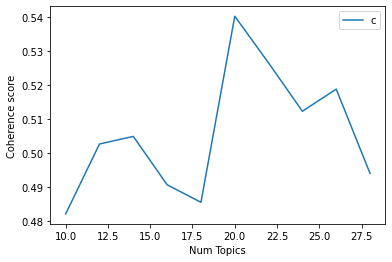

In [ ]:
# Show graph
limit=30; start=10; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

##Hyperparameter Tuning

In [43]:
def compute_coherence_values(dictionary, corpus, a):
    
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                num_topics=20, 
                                                id2word=dictionary,
                                                alpha = 0.5, 
                                            #eta = 1.6, 
                                            passes=b, 
                                            random_state=20, 
                                            chunksize = a,
                                            iterations=c)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        return  coherencemodel.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 11
max_topics = 35
step_size = 3
topics_range = range(min_topics, max_topics, step_size)

passes=[40,50,60]
chunksize = [10, 75,125]
iterations = [200,300,400]
#alpha=[0.5, 0.7]
#numtopics=[12,15,18,20,21,22,23,24,25]
# Validation sets
num_of_docs = len(corpus)

model_results = {#'Validation_Set': [],
                 'ChunkSize': [],
                 'Passes': [],
                 'Iterations': [],
                 'Coherence': [],
                 #'Alpha': []
                #'Num_Topics':[]
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm()
count=0   
    # iterate through validation corpuses
    #for i in range(len(corpus_sets)):
        # iterate through number of topics
for a in chunksize:
            # iterate through alpha values
    for b in passes:
                # iterare through beta values
       for c in iterations:
                    count+=1
                    print(count)
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, a=a)
                                                
                    # Save the model results
                    #model_results['Validation_Set'].append(corpus_title[i])
                    #model_results['Topics'].append(k)
                    model_results['ChunkSize'].append(a)
                    model_results['Passes'].append(b)
                    model_results['Iterations'].append(c)
                    #model_results['Num_Topics'].append(a)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    
pbar.close()

In [ ]:
df_param = pd.DataFrame(model_results)
df_param.head(27)

##Building the LDA Model

In [70]:

lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                            id2word=id2word, 
                                            num_topics=20, 
                                            chunksize = 100, 
                                            passes=50,
                                            alpha = 0.5, 
                                            #eta = 2.5, 
                                            workers=2, 
                                            random_state=500,
                                            iterations=50,
                                            per_word_topics = True
                                            )

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.016*"film" + 0.010*"release" + 0.007*"covid" + 0.007*"work" + 0.007*"event" + 0.007*"festival" + 0.006*"theatre" + 0.006*"actor" + 0.006*"pandemic" + 0.006*"woman"
Topic: 1 
Words: 0.012*"market" + 0.011*"price" + 0.009*"december" + 0.008*"india" + 0.008*"sector" + 0.008*"sale" + 0.007*"increase" + 0.007*"unit" + 0.007*"financial" + 0.007*"bank"
Topic: 2 
Words: 0.027*"court" + 0.023*"case" + 0.014*"order" + 0.009*"justice" + 0.008*"filed" + 0.008*"high_court" + 0.007*"accused" + 0.006*"petition" + 0.006*"issued" + 0.006*"loan"
Topic: 3 
Words: 0.034*"temple" + 0.007*"village" + 0.006*"reddy" + 0.006*"tribal" + 0.005*"idol" + 0.005*"church" + 0.005*"community" + 0.005*"devotee" + 0.005*"series" + 0.004*"tirupati"
Topic: 4 
Words: 0.013*"farmer" + 0.011*"hospital" + 0.011*"rain" + 0.011*"district" + 0.007*"area" + 0.007*"water" + 0.007*"crop" + 0.006*"paddy" + 0.005*"temperature" + 0.005*"elephant"
Topic: 5 
Words: 0.017*"delhi" + 0.009*"hyderabad" + 0.006*"code" + 0.

In [71]:
# Compute Perplexity
#print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5912378083980684


##Visualization using Word Clouds and Inter Topic Distance Map

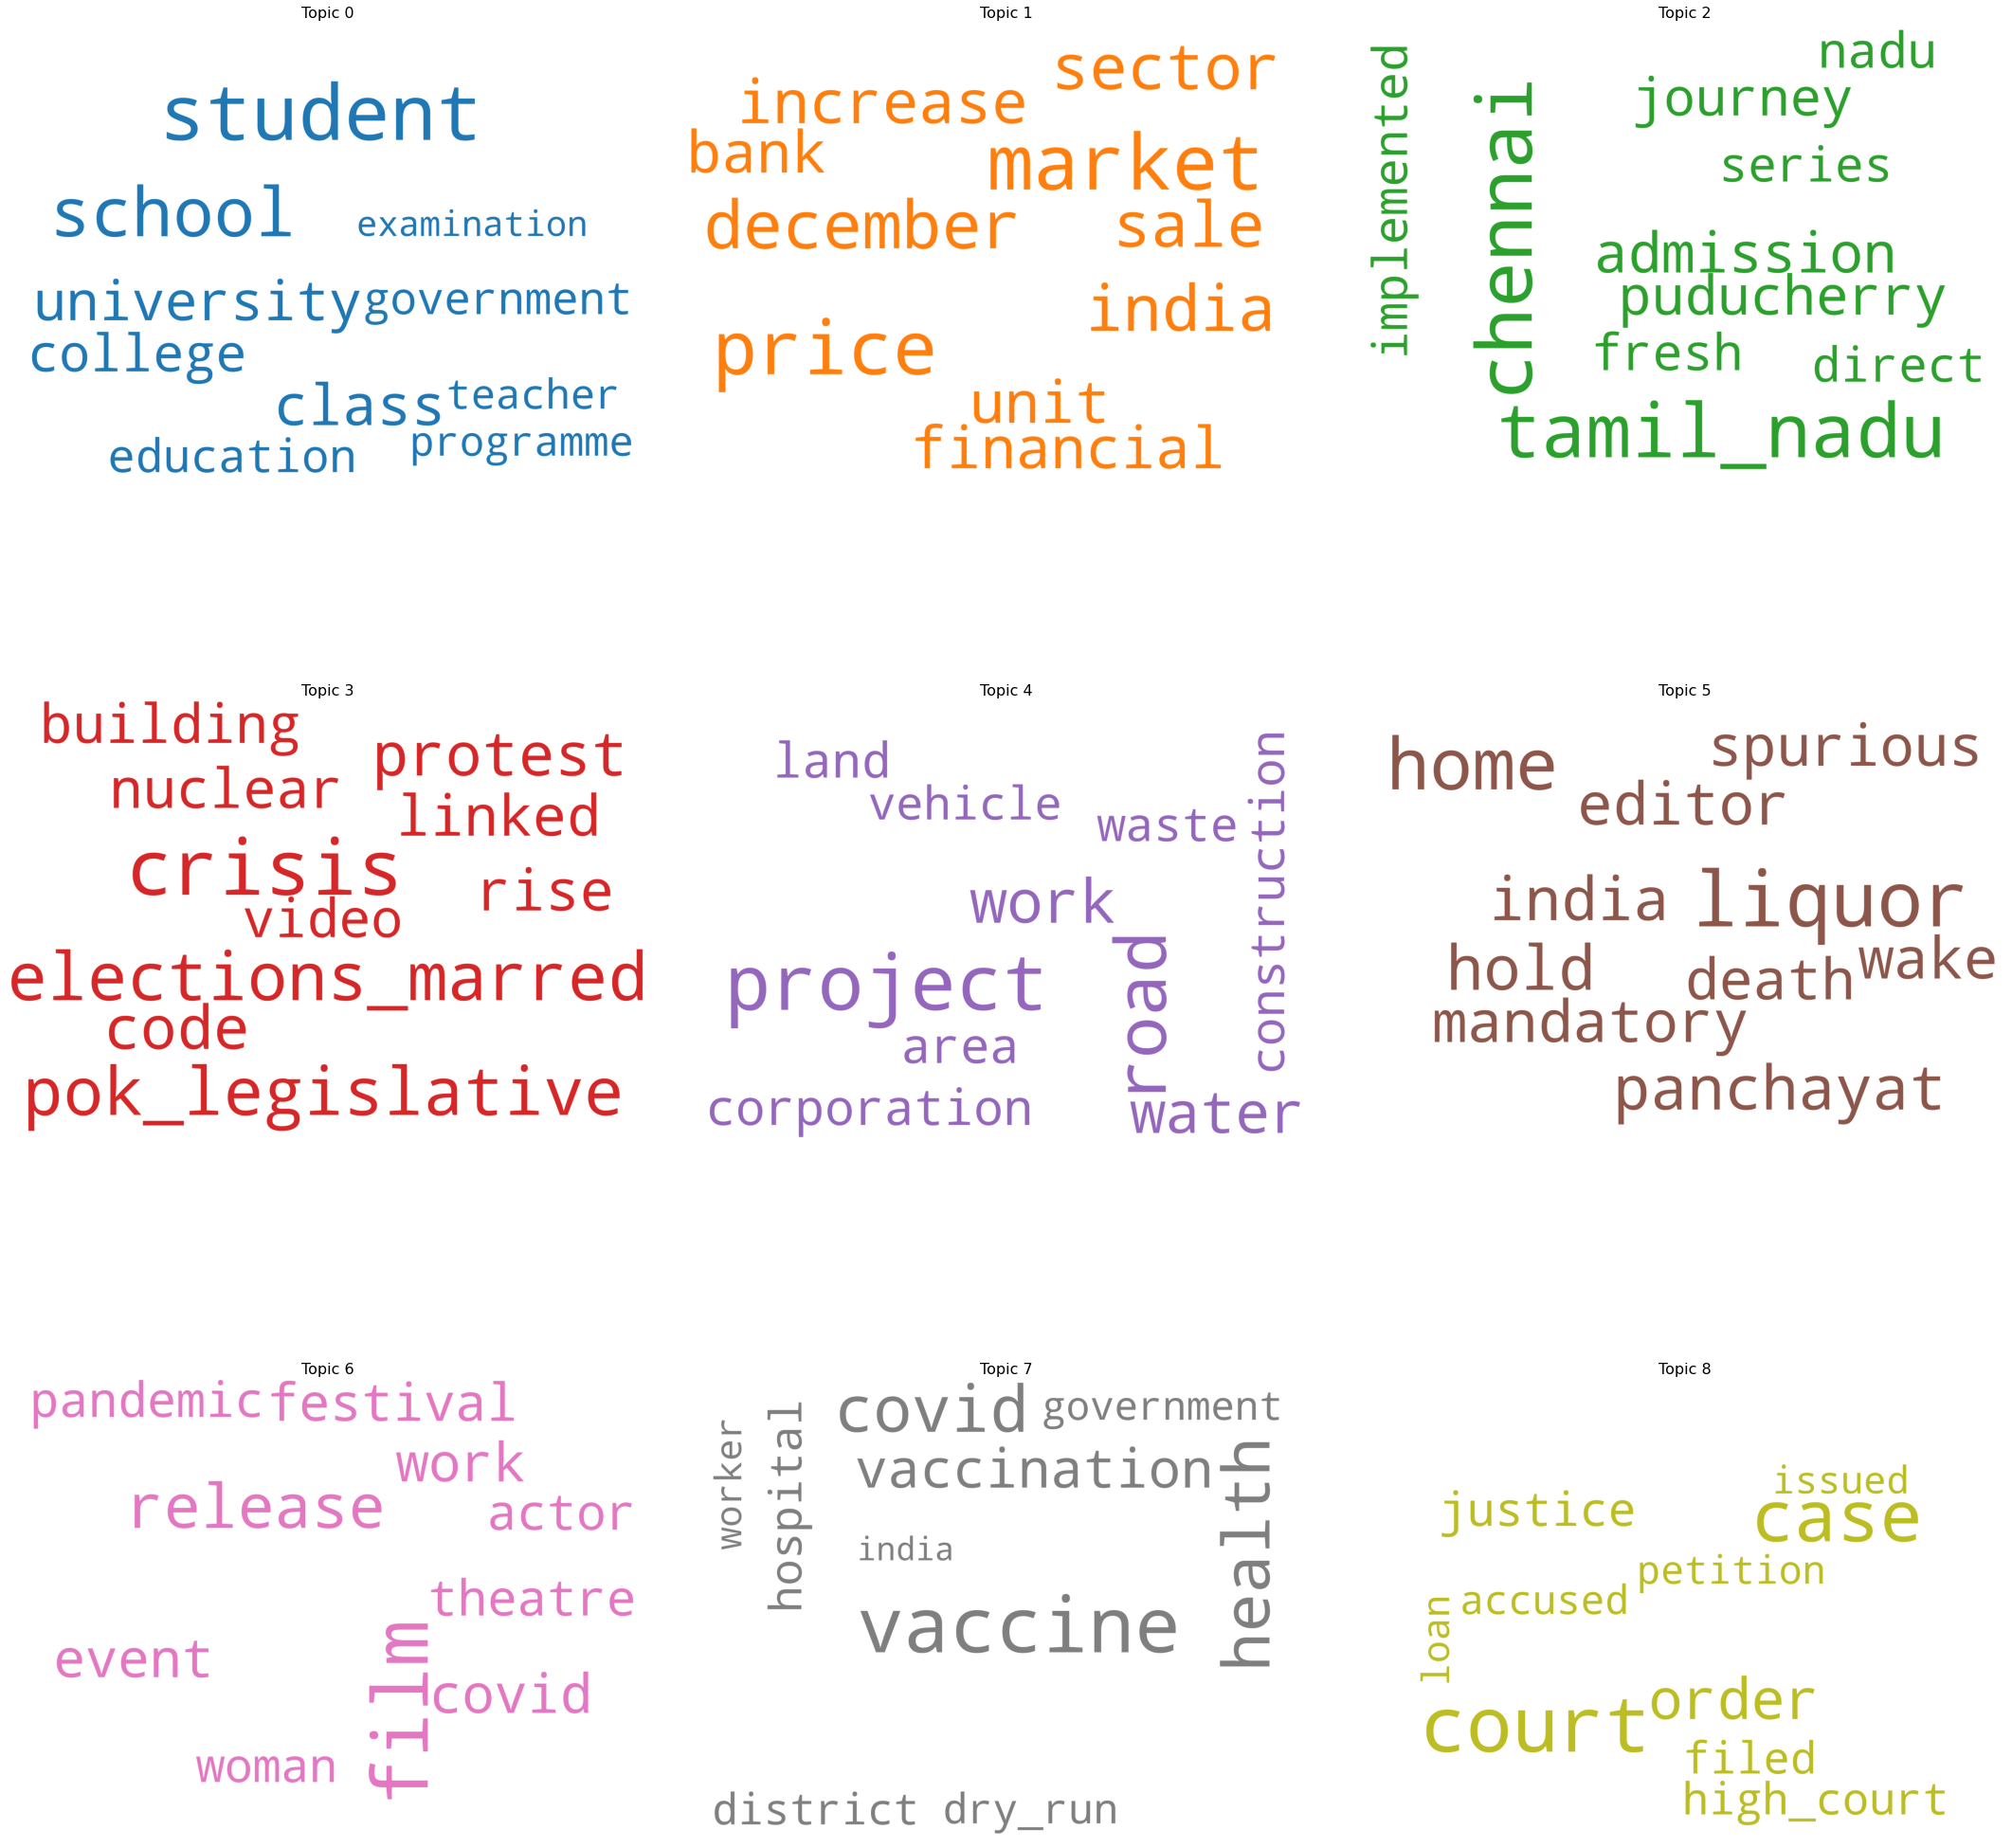

In [72]:
#Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# Assigning different colors to each word cloud
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

# Drawing the word cloud 
Word_cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  contour_color='steelblue',
                  color_func=lambda *args, **kwargs: cols[i])

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    Word_cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(Word_cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=30, hspace=30)
plt.axis('off')
plt.margins(x=20, y=20)
plt.tight_layout()
plt.show()

In [73]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.151430  0.061851       1        1  11.755391
13    -0.166465  0.003998       2        1   8.111056
10    -0.049803  0.242778       3        1   7.399574
15    -0.028102 -0.134036       4        1   6.746717
19    -0.105206  0.130494       5        1   6.535363
8     -0.174195 -0.073596       6        1   5.968963
2     -0.089629 -0.063417       7        1   5.869471
11    -0.129575  0.016489       8        1   5.306277
1     -0.043426  0.103990       9        1   5.007949
16    -0.041728 -0.238650      10        1   4.583997
14     0.165005 -0.005569      11        1   4.399146
6      0.053016  0.108498      12        1   4.277872
0      0.026785  0.101311      13        1   4.192278
7     -0.083718 -0.132041      14        1   3.944000
4     -0.038658 -0.066215      15        1   3.869081
12     0.170599 -0.020691      16        1   2.661799
9      0.151657 -0.049216      17        1   2.618180
5      0.186150 -0.001238      18        1   2.409412
3      0.149900  0.055108      19        1   2.329755
18     0.198822 -0.039847      20        1   2.013719, topic_info=            Term         Freq        Total Category  logprob  loglift
1450      police  2837.000000  2837.000000  Default  30.0000  30.0000
473         case  3212.000000  3212.000000  Default  29.0000  29.0000
1006     vaccine  1893.000000  1893.000000  Default  28.0000  28.0000
225        covid  2932.000000  2932.000000  Default  27.0000  27.0000
97         party  1787.000000  1787.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1553     teacher    68.523257   394.702990  Topic20  -5.3383   2.1542
493        delhi    70.367521  1089.531399  Topic20  -5.3117   1.1654
1244  population    64.349041   219.353187  Topic20  -5.4011   2.6788
244         film    64.601489   667.570681  Topic20  -5.3972   1.5698
306         test    63.572208   951.521951  Topic20  -5.4133   1.1993

[1233 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
1524       8  0.993127      academic
4003      17  0.987986  accept_woman
2326       1  0.036601       account
2326       3  0.045751       account
2326       5  0.134204       account
...      ...       ...           ...
312       18  0.079352         world
10800     19  0.982784       worship
857        1  0.993032   yediyurappa
6677      15  0.980085         yield
13426      3  0.978938          zoom

[3033 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 14, 11, 16, 20, 9, 3, 12, 2, 17, 15, 7, 1, 8, 5, 13, 10, 6, 4, 19])

In [74]:
test_list=test['Text'].to_list()

In [ ]:
dist_list = []
count=0
for i in test_list:
  count+=1
  text = i
  dist_list.append(lda_model[id2word.doc2bow(text)])
  print("Document# ", count)
  print(lda_model[id2word.doc2bow(text)])
  print()

In [77]:
df = pd.DataFrame(zip(test['File_Name'], test['Text'], dist_list),
               columns =['File_Name', 'Tokenized_Text', 'Topic_Distribution'])
df.head(20)

,File_Name,Tokenized_Text,Topic_Distribution
0,thehindu_jan_8_file_235.json,"[pact, open, access, manuguru, solar, power, a...","([(0, 0.07076436), (1, 0.06472059), (2, 0.0431..."
1,thehindu_jan_1_file_388.json,"[stamp, duty, rise, revenue, waiver, generated...","([(0, 0.060874663), (1, 0.50981367), (2, 0.023..."
2,thehindu_jan_5_file_74.json,"[stable, cardiologist, devi, meet, team, treat...","([(0, 0.012893455), (4, 0.32354438), (6, 0.105..."
3,thehindu_jan_6_file_24.json,"[china, escalates, hong_kong, crackdown, arres...","([(0, 0.01071335), (1, 0.051228967), (2, 0.020..."
4,thehindu_jan_12_file_198.json,"[erravalli, village, wear, deserted, lookover,...","([(0, 0.036224216), (3, 0.021699553), (4, 0.06..."
5,thehindu_jan_1_file_245.json,"[release, grant, avinashilingam, deemed, unive...","([(0, 0.032575723), (1, 0.049639445), (2, 0.03..."
6,thehindu_jan_4_file_117.json,"[foundation_stone, laid, wednesday, anubhava, ...","([(1, 0.014469163), (3, 0.02456384), (6, 0.105..."
7,thehindu_jan_4_file_204.json,"[congress, seek, direction, speaker, mlas, pet...","([(0, 0.010034275), (2, 0.34919983), (8, 0.010..."
8,thehindu_jan_8_file_213.json,"[consultation, meeting, school, reopening, con...","([(1, 0.016780708), (2, 0.028834438), (8, 0.02..."
9,thehindu_jan_14_file_22.json,"[breathed, cleaner, bhogipm, microgramcubic_me...","([(0, 0.019792063), (1, 0.01673279), (2, 0.024..."
